In [1]:
import numpy as np
import aubio

def build_sinusoid(length, freqs, samplerate):
    return np.sin( 2. * np.pi * np.arange(length) * freqs / samplerate).astype(aubio.float_type)

def run_pitch(p, input_vec):
    cands = []
    for vec_slice in input_vec.reshape((-1, p.hop_size)):
        a = p(vec_slice)[0]
        cands.append(a)
    return cands

In [2]:
samplerate = 44100
sin_length = (samplerate * 10) % 512 * 512
freqs = np.zeros(sin_length)

partition = sin_length // 8
pointer = 0

pointer += partition
freqs[pointer: pointer + partition] = 440

pointer += partition
pointer += partition
freqs[ pointer : pointer + partition ] = 740

pointer += partition
freqs[ pointer : pointer + partition ] = 1480

pointer += partition
pointer += partition
freqs[ pointer : pointer + partition ] = 400 + 5 * np.random.random(sin_length//8)

a = build_sinusoid(sin_length, freqs, samplerate)

In [11]:
methods = ['default', 'schmitt', 'fcomb', 'mcomb', 'yin', 'yinfft']
cands = {}
buf_size = 2048
buf_size = 4096
hop_size = 512

for method in methods:
    p = aubio.pitch(method, buf_size, hop_size, samplerate)
    cands[method] = run_pitch(p, a)
    print(method)
    print(cands[method])


default
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 463.19904, 449.8493, 445.44675, 443.03793, 441.5124, 440.59415, 440.24115, 440.20477, 440.20486, 440.2049, 440.20486, 440.20486, 440.20477, 440.20477, 440.20477, 440.20486, 440.20483, 440.20477, 440.20483, 440.20486, 440.20496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 759.1251, 748.49994, 744.75696, 742.6461, 741.2643, 740.46954, 740.17114, 740.1419, 740.142, 740.142, 740.142, 740.1421, 740.1419, 740.142, 740.1419, 740.142, 740.14215, 740.142, 740.1419, 740.142, 740.142, 740.2113, 740.9198, 741.70764, 741.4142, 740.7614, 740.27844, 1480.8556, 1480.7261, 1480.7261, 1480.7261, 1480.7261, 1480.7261, 1480.7261, 1480.7261, 1480.7261, 1480.7262, 1480.7261, 1480.7261, 1480.7261, 1480.7262, 1480.7261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 459.18054, 0.0

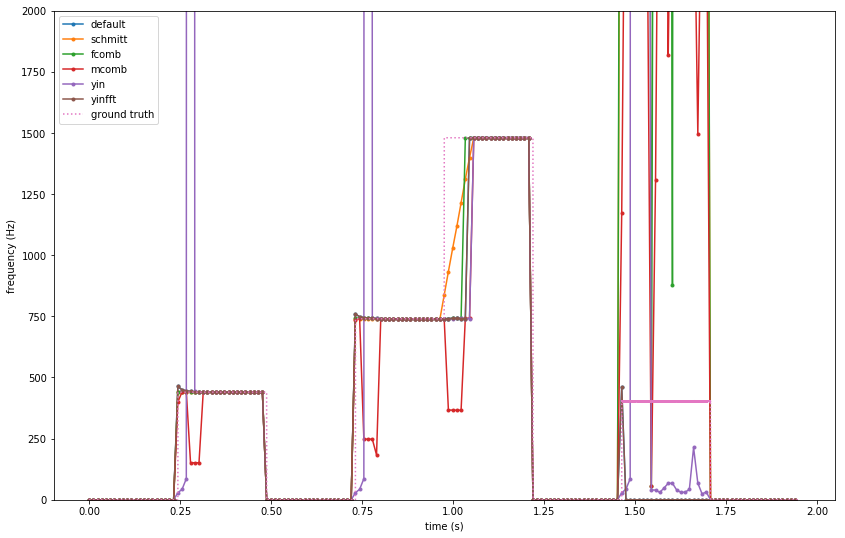

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# times
ramp = np.arange(0, sin_length / hop_size).astype('float') * hop_size / samplerate

# plot each result
plt.figure(figsize=(14,9))
for method in methods:
    plt.plot(ramp, cands[method], '.-', label=method)

# plot ground truth
ramp = np.arange(0, sin_length).astype('float') / samplerate
plt.plot(ramp, freqs, ':', label = 'ground truth')

plt.legend(loc='upper left')

plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.ylim([0,2000])
plt.show()